In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [28]:
def plot_image_grid(input_df, rows, cols, title=None, savepath=None):
    size = 3*max(rows, cols)
    fig, fr = plt.subplots(rows,cols, figsize=(size, size))
    fr = np.ravel(fr)
    
    idc = np.random.randint(0, input_df.shape[0], rows*cols)

    # plot the images of some of these objects to see what the voters saw
    for i, name in enumerate(input_df['name'].iloc[idc]):
        object_name = name
        path = '../image/thumbnails/{}_insp.png'.format(object_name)
        image = Image.open(path)
        fr[i].imshow(image)
        fr[i].set_title(object_name)
        fr[i].set_axis_off()


    if title:
        fig.suptitle(title)
    fig.tight_layout()
    
    if savepath:
        plt.savefig(savepath, dpi=450, bbox_inches='tight')
    plt.show()

In [3]:
def get_cols(df, cols):
    return df[cols].T.values

In [4]:
# df_votes.json is created in ./df_stacked.ipynb. 
#  Make sure to re-run that whenever we change something, 
#   otherwise we'll be working with stale data in this notebook
df_votes = pd.read_json('df_votes.json')
df = pd.read_json('df_stacked.json')

In [6]:
workflows = df['workflow_name'].unique().tolist()
print(workflows)

['Classify! Hardcore edition', 'Classify!', 'Classify on the go!']


In [7]:
hc = df.query('workflow_name == @workflows[0]')
classify = df.query('workflow_name == @workflows[1]')
onthego = df.query('workflow_name == @workflows[2]')

In [33]:
catalogue_targets = np.loadtxt('../../catalogue/sf_catalogue_targets.txt', dtype='str')

---

In [12]:
df_votes.shape[0]

6362

In [13]:
df_votes.query('RA.isnull()').shape[0]

922

---

### Inspect images of objects without properties

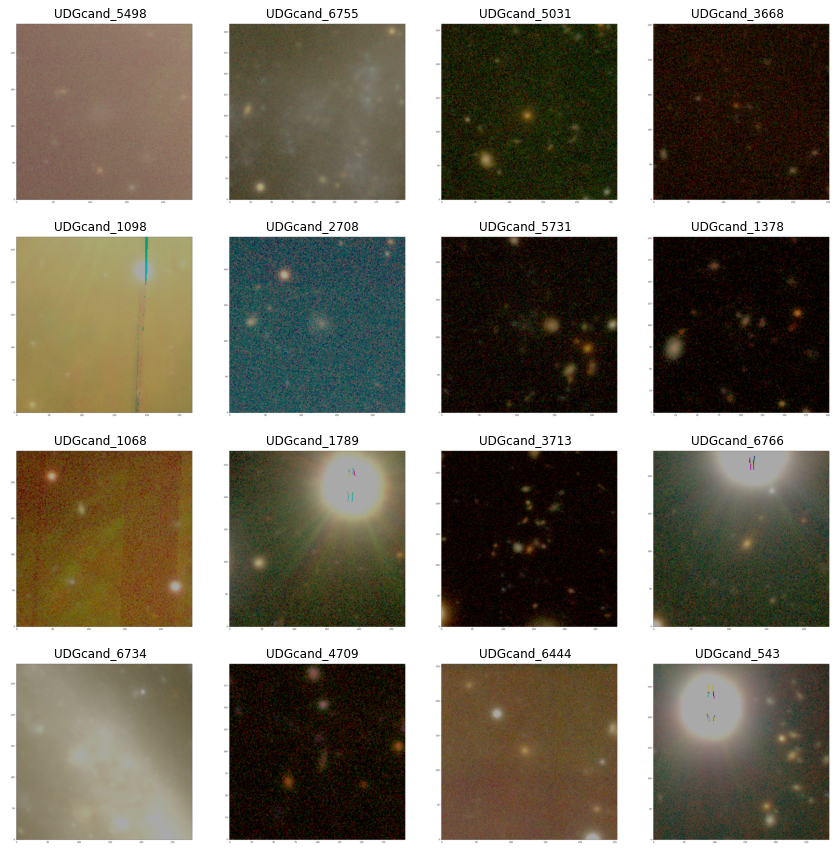

In [30]:
plot_image_grid(df_votes.query('RA.isnull()'), 4, 4, savepath='grid 4x4 no properties.png')

In [34]:
df_votes.query('RA.isnull() & name.isin(@catalogue_targets)')

,name,vote_count,T0,T2,T1,T3,T4,T5,T9,RA,...,T4 % distorted/disturbed,T4 % elliptical,T4 % round,T5 % smooth and fuzzy,T5 % smooth and dense,T5 % clumpy and/or featured,T9 % something else,T9 % looks like a small star,T9 % scattered light,T9 % nothing: background too bright or galaxy too faint


### Get DES images for some of these objects

In [130]:
no_props = df_votes.query('RA.isnull()')

idc = np.random.randint(0, no_props.shape[0], 50)

names = no_props.iloc[idc][['name']].values.tolist()

In [137]:
names = [name[0] for name in names]

In [141]:
subj = df.query('Filename.isin(@names)')

def get_ra_dec(x):
    obj = list(x['subject_data'].values())[0]
    name = x['Filename']
    ra, dec = [obj.get(key) for key in ['RA', "DEC"]]
    return [name, ra, dec]

name_and_coords = subj.apply(lambda x: get_ra_dec(x), axis=1)

In [142]:
seen = []
filtered = []

for entry in name_and_coords:
    name, ra, dec = entry
    if name in seen:
        continue
    else:
        seen.append(name)
        filtered.append((name, ra, dec))

In [145]:
object_info

,name,RA,DEC,Reff,r_mag,g_mag,axis_ratio,pos_angle,n,u,...,ge,re,ie,Reffe,r_mage,ne,C,mue_r,bae,RFF
0,UDGcand_0,56.232609,-35.335724,2.89340,19.831900,-1.0,0.6034,-27.775499,1.0271,22.426844,...,0.054816,0.046306,0.044244,0.332842,0.131324,0.117142,2.764210,23.585331,0.027318,-99.0
1,UDGcand_2,55.633900,-35.866928,2.63998,20.237101,-1.0,0.7488,15.694100,1.6470,25.864775,...,0.160716,0.051180,0.041536,0.378239,0.166238,0.140836,3.494850,24.025892,0.032711,-99.0
2,UDGcand_3,55.688835,-35.471954,1.97838,21.729500,-1.0,0.8003,10.619600,0.3000,23.426687,...,0.125680,0.112662,0.066605,0.452366,0.274637,0.208488,1.926754,24.964056,0.048007,-99.0
3,UDGcand_4,55.832767,-35.379551,5.79236,18.351999,-1.0,0.6255,61.521198,6.1206,22.914799,...,0.090910,0.037912,0.041479,0.688735,0.136073,0.120439,3.838429,23.651720,0.028070,-99.0
4,UDGcand_5,56.058018,-35.596409,2.98190,19.478001,-1.0,0.8144,-11.880000,0.8693,22.430893,...,0.055276,0.043606,0.043281,0.349424,0.133957,0.118973,2.764210,23.622435,0.027735,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,UDGcand_7264,54.970654,-35.972164,3.31000,22.427999,-1.0,0.2868,-48.022598,0.3000,-1.000000,...,1.789727,0.372401,0.089716,1.073738,0.399836,0.279605,1.887092,25.665962,0.063968,-99.0
5532,UDGcand_7265,54.968956,-36.141941,3.66178,21.009701,-1.0,0.5701,85.221802,0.6705,24.194483,...,0.202681,0.122055,0.079286,0.947817,0.313757,0.231352,2.385606,25.212914,0.053150,-99.0
5533,UDGcand_7266,54.339558,-36.665840,2.63778,19.857901,-1.0,0.5906,-34.667400,5.1036,24.807089,...,0.097727,0.042657,0.041258,0.274912,0.118113,0.107828,3.817140,23.387201,0.025192,-99.0
5534,UDGcand_7268,54.951485,-36.413120,2.40214,20.301100,-1.0,0.5467,38.459400,1.7985,22.690609,...,0.054219,0.049827,0.045577,0.270609,0.128406,0.115103,3.313789,23.543339,0.026853,-99.0


In [148]:
filtered

for entry in filtered:
    name, ra, dec = entry
    print('{}, {}'.format(ra, dec))
    
for entry in filtered:
    name, _, _ = entry
    print(name)

55.9163475037, -36.8839912415
52.8438072205, -33.5470962524
54.7909469604, -33.7038612366
50.1954154968, -37.4541778564
54.6393432617, -35.9570808411
54.3057098389, -33.9181556702
54.4619026184, -35.3631057739
52.8057823181, -34.9486503601
54.567363739, -34.301940918
51.7814941406, -37.5149917603
52.8057289124, -33.649974823
55.0341148376, -35.6254959106
52.6354408264, -37.352268219
51.8337097168, -35.7344894409
53.2692260742, -33.8464431763
56.4358558655, -34.1226730347
54.2856674194, -33.8054847717
52.9704360962, -36.5670127869
53.3431587219, -34.9061889648
51.6023674011, -33.1103591919
54.4950141907, -34.946182251
53.1880111694, -35.8655891418
53.4559440613, -36.1532669067
54.1522445679, -34.7954063416
54.7740325928, -34.9417648315
55.0488395691, -35.2272987366
54.0777664185, -34.7854232788
52.0535507202, -35.9122810364
54.5488471985, -34.8672294617
55.3669433594, -34.8767814636
53.4263572693, -36.1416053772
54.5308532715, -33.1175689697
57.3826675415, -37.3329849243
54.512550354, -

#### From venhola thesis_final_print: use 0.0967 kpc/arcsec2

In [152]:
# 3kpc object
3/0.0967

r = np.sqrt((3/0.0967)/np.pi); r  # r = 3.142 arsec, so should be visible on 1 arcmin x 1arcmin tile

3.142479505274298

## Show some DES images (I don't know which objects these are)

In [153]:
from astropy.io import fits

In [183]:
import os
base = '../image/des/_/da49938612254da086f8915bab1014f0/'

files = []
for entry in os.listdir(base):
#     print(entry)
    if not '.' in entry:
        first = os.listdir('{}/{}'.format(base, entry))[0]
        fits_file = os.listdir('{}/{}/{}'.format(base, entry, first))[0]
        
        files.append('{}/{}/{}/{}'.format(base, entry, first, fits_file))

In [193]:
data_list = []
for file in files:
    hdu_list = fits.open(file)
    data = hdu_list[0].data
    data_list.append(data)

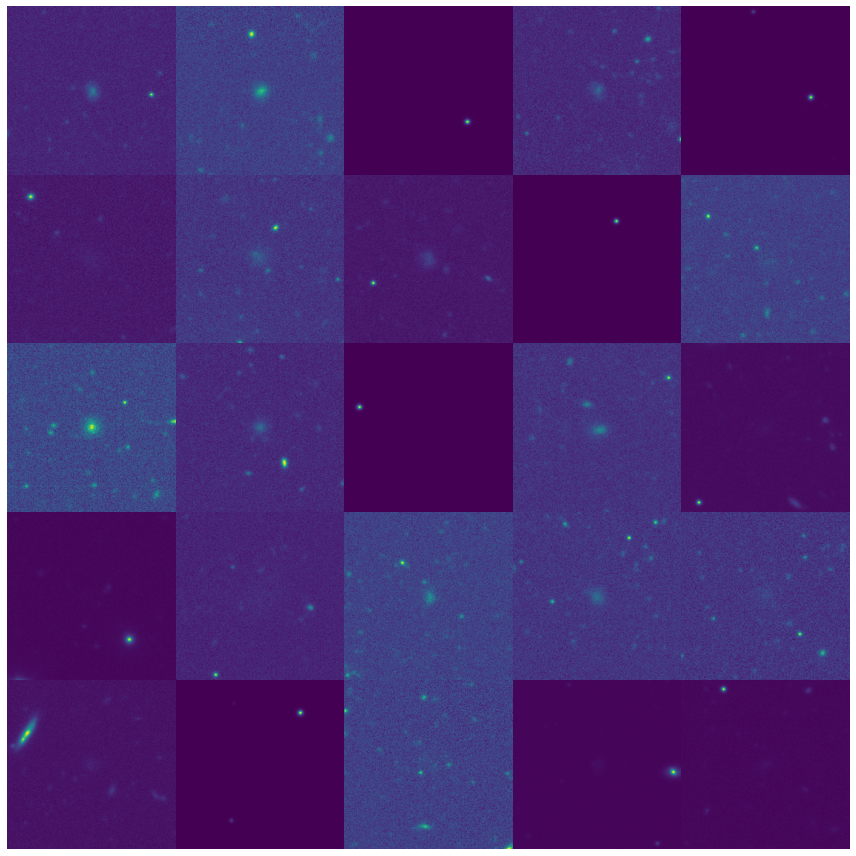

In [203]:
fig, fr = plt.subplots(5,5, figsize=(12,12), gridspec_kw=dict(hspace=0, wspace=0))

fr = np.ravel(fr)

for i, d in enumerate(data_list[:25]):
    fr[i].imshow(d)
    fr[i].set_axis_off()

fig.tight_layout()

In [204]:
from glob import glob

In [236]:
no_props_paths = glob('{}/{}'.format(os.getcwd(), '../image/des/50-no-props/**/**/**/*.png'))

In [253]:
info = pd.read_csv('../image/des/50-no-props/cfb7448b76414df0bb5c425a9dc6b387/positions_cfb7448b76414df0bb5c425a9dc6b387.csv')[['RA', 'DEC','TILENAME']]

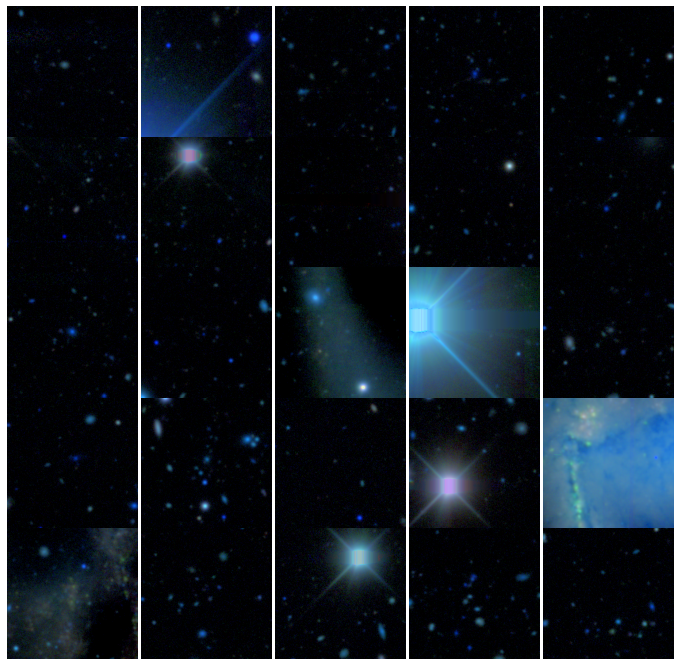

In [250]:
fig, fr = plt.subplots(5,5, figsize=(12,12), gridspec_kw=dict(hspace=0, wspace=0))
fr = np.ravel(fr)

for i, path in enumerate(no_props_paths[:25]):
    image = Image.open(path)
    fr[i].imshow(image)
#     fr[i].set_title(object_name)
    fr[i].set_axis_off()
    
for i in range(len(fr)):
    fr[i].set_axis_off()
# fig.tight_layout()

In [256]:
tilenames = []

for path in no_props_paths:
    stubs = path.split('\\')
    for stub in stubs:
        if stub.startswith('DES') and not '.' in stub:
            tilenames.append(stub)

In [299]:
len(info)

49

In [298]:
ras = [round(float(entry[1]),5) for entry in filtered]

info['RA'] = info['RA'].apply(lambda x: round(x, 5))

[info.query('RA == @ras[@i]').index.tolist() for i in range(len(ras))]

[[42],
 [14],
 [32],
 [0],
 [36],
 [24],
 [35],
 [11],
 [38],
 [3],
 [13],
 [34],
 [17],
 [5],
 [12],
 [44],
 [31],
 [20],
 [23],
 [4],
 [30],
 [16],
 [18],
 [28],
 [27],
 [39],
 [29],
 [8],
 [26],
 [40],
 [19],
 [25],
 [47],
 [37],
 [7],
 [1],
 [15],
 [22],
 [46],
 [9],
 [21],
 [10],
 [2],
 [43],
 [6],
 [41],
 [33],
 [45],
 []]

In [293]:
info.query('RA == @ras[6]')

,RA,DEC,TILENAME
35,54.4619,-35.363106,DES0338-3540


In [276]:
round(float(filtered[0][1]),6)

55.916348